In [1]:
import numpy as np
n = 6

In [2]:
def create_cities(N):
    cities = []
    for i in range(N):
        cities.append(np.random.rand(2) * 10)
    return np.array(cities)


In [3]:
cities = create_cities(n)


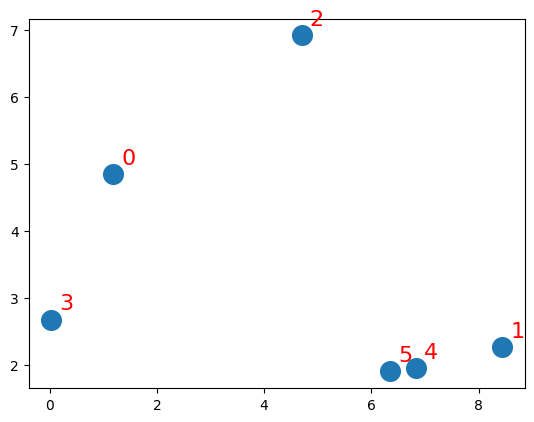

In [4]:
from scripts.plots import plot_cities
plot_cities(cities)


In [5]:
import itertools

def distance_between_points(point_A, point_B):
    return np.sqrt((point_A[0] - point_B[0])**2 + (point_A[1] - point_B[1])**2)

def get_distance_matrix(cities):
    number_of_cities = len(cities)
    matrix = np.zeros((number_of_cities, number_of_cities))
    for i in range(number_of_cities):
        for j in range(i, number_of_cities):
            matrix[i][j] = distance_between_points(cities[i], cities[j])
            matrix[j][i] = matrix[i][j]
    return matrix

In [6]:
# Define the distance matrix for the TSP problem
distance_matrix = np.array(get_distance_matrix(cities))
print(distance_matrix)

[[0.         7.69601484 4.07889417 2.46464175 6.33888095 5.94408909]
 [7.69601484 0.         5.96858723 8.41878511 1.63997024 2.11839251]
 [4.07889417 5.96858723 0.         6.31428663 5.40202627 5.28189131]
 [2.46464175 8.41878511 6.31428663 0.         6.83672429 6.36873065]
 [6.33888095 1.63997024 5.40202627 6.83672429 0.         0.47969915]
 [5.94408909 2.11839251 5.28189131 6.36873065 0.47969915 0.        ]]


Time required :-  3.122187852859497
Optimal solution: [5 2 1 0 4 3]
expected value of the cost function : 23.026476393166305


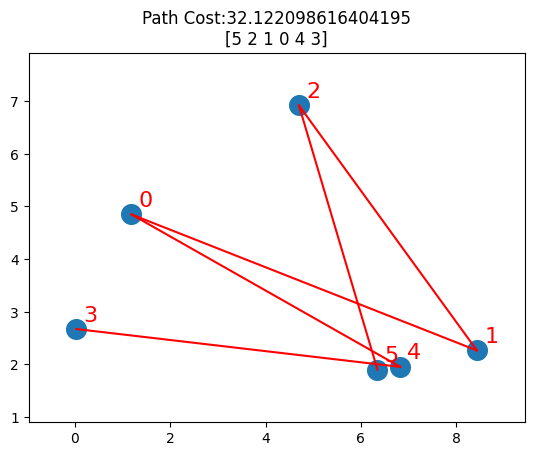

In [14]:
import numpy as np
from scipy.optimize import minimize
from qiskit import Aer, QuantumCircuit, execute
import time

# Defining the objective function for the TSP problem
def tsp_objective_function(route):
    total_dist = 0
    for i in range(len(route)):
        j = (i + 1) % len(route)
        city_i = route[i]
        city_j = route[j]
        total_dist += distance_matrix[city_i][city_j]
    return total_dist


# Define the quantum circuit for simulated annealing
def simulated_annealing_circuit(num_qubits):
    circuit = QuantumCircuit(num_qubits, num_qubits)
    circuit.h(range(num_qubits))
    return circuit

# Define the cost function for the quantum circuit
def cost_function(params):
    backend = Aer.get_backend('qasm_simulator')

    
    circuit = simulated_annealing_circuit(len(params))
    
    
    for i, param in enumerate(params):
        circuit.rz(param, i)
        # print(circuit)
        
    
    circuit.measure(range(len(params)), range(len(params)))
    shots = 1000
    result = execute(circuit, backend, shots=shots).result()
    counts = result.get_counts()
    cost = 0
    for state in counts.keys():
        state_cost = tsp_objective_function(np.array(list(state), dtype=int))
        cost += (state_cost * counts[state] / shots)
    return cost


# Solving the TSP problem using simulated annealing
num_cities = n
num_params = num_cities
initial_params = np.random.uniform(0, 2 * np.pi, num_params)

start_time = time.time()
result = minimize(cost_function, initial_params, method='L-BFGS-B')
end_time = time.time()

print("Time required :- ", end_time - start_time)

solution = np.array(list(result.x)).argsort()

print("Optimal solution:", solution)

print("expected value of the cost function :", result.fun)

from scripts.plots import plot_solution
plot_solution(cities, solution)

In [8]:
#Ploting code refrence : https://github.com/mstechly/quantum_tsp_tutorials/tree/master/tutorials/scripts